In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (16.0, 4.0), 
            'axes.grid.axis': 'both',
            "grid.color": "lightgrey",
            'axes.facecolor':'white'})

## Оптимизируем рекламу
**У нас есть 3 канала привлечения клиентов в cервис.**

    Для каждого из них известны CAC для N человек и LTV для когорты из 100 клиентов.
    Мы хотим привлечь 1300 новых пользователей в сервис. 
    Максимизируем прибыль за 4 месяца с учетом костов. 

Определим через какой канал это лучше всего делать.

In [8]:
CAC = pd.read_csv('Cac_final2022-11-08_21-34.csv', sep=';')

In [14]:
CAC.head()

,Category,cac1,cac2,cac3
0,100,252554,447905,366840
1,200,267481,453396,378476
2,300,286647,460447,392687
3,400,311257,469501,410046
4,500,342857,481126,431247


In [ ]:
#возмем кол-во пользователей как индекс 
CAC.set_index('Category', inplace=True)

Text(0.5, 1.0, 'CAC для N человек')

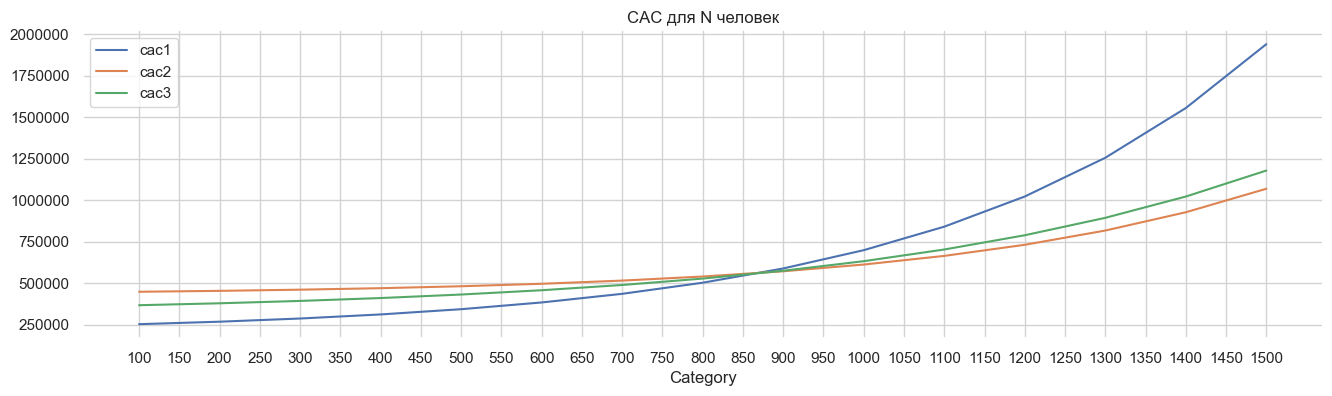

In [297]:
CAC.plot(xticks=np.arange(100,1550,50))
plt.ticklabel_format(style='plain', axis='y')
plt.title('CAC для N человек')

Так как мы хотим привлечь 1300 новых пользователей в сервис, наилучшим каналом будет 3-й.

Посчитаем для него САС на 1 человека.

In [54]:
CAC.loc[1300] / 1300

cac1    965.830000
cac2    628.382308
cac3    687.384615
Name: 1300, dtype: float64

### Теперь оценим сколько каждый пользователь приносит денег за время "жизни" (LTV)

In [163]:
LTV = pd.read_csv('LTV_12022-11-08_21-34.csv', sep=';')

In [164]:
LTV.head()

,Category,LTV1,LTV2,LTV3
0,1,76068,63599,41581
1,2,50217,46836,35080
2,3,30414,34825,29757
3,4,19796,26219,25399
4,5,13200,20052,21830


In [165]:
#возмем номер месяца как индекс 
LTV.set_index('Category', inplace=True)

Text(0.5, 1.0, 'LTV за N-й месяц для когорты из 100 человек')

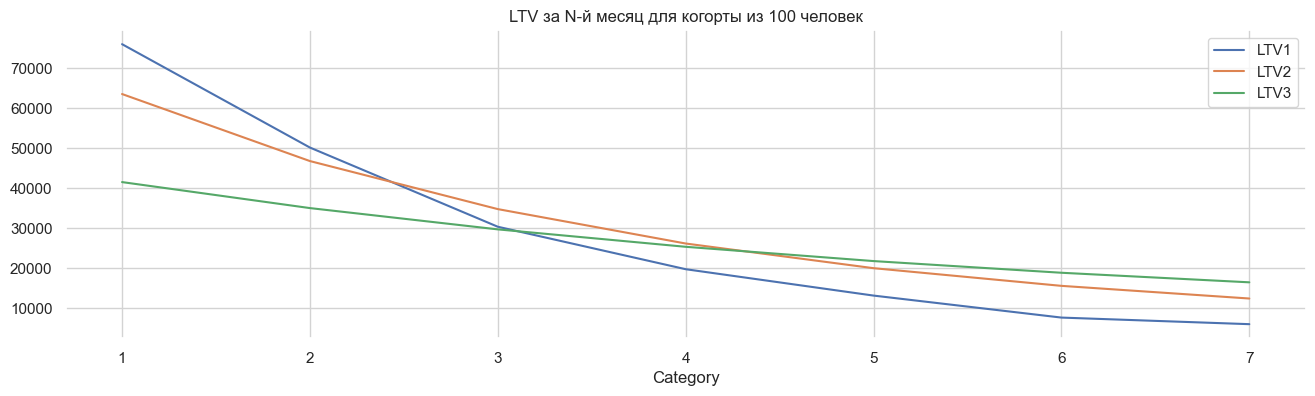

In [298]:
LTV.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.title('LTV за N-й месяц для когорты из 100 человек')

### Нас интересует максимальная прибыль за 4й месяц, минус расходы на привлечение

LTV для N когорты находится как (суммарный доход от всех клиентов когорты за N период / кол-во клиентов)

In [302]:
#LTV для 1300 человек
LTV.loc[4] * 1300

LTV1    25734800
LTV2    34084700
LTV3    33018700
Name: 4, dtype: int64

In [303]:
df = pd.DataFrame([(LTV.loc[4].values * 1300) - (CAC.loc[1300].values)], columns=['chanal_1','chanal_2','chanal_3',]).T
print(f'Максимальная прибыль {df.max().to_list()[0]} от 2 канала')

Максимальная прибыль 33267803 от 2 канала


In [152]:
df

,0
chanal_1,24479221
chanal_2,33267803
chanal_3,32125100


### Посмотрим на динамику прибыли с 1300 привлечённых клиентов по месяцам их "жизни"

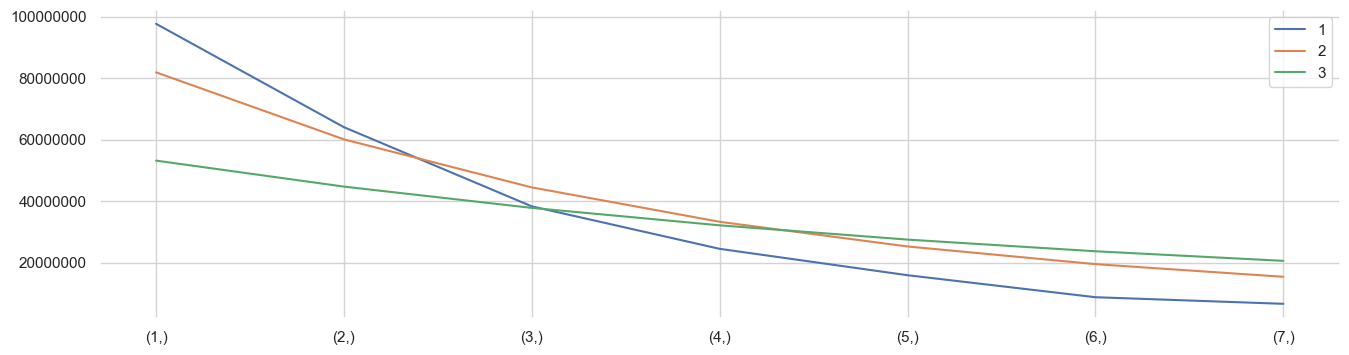

In [299]:
n = np.arange(1,8,1)
pd.DataFrame([(LTV.loc[i].values * 1300) - (CAC.loc[1300].values) for i in n], index=[n], columns=[1,2,3]).plot()
plt.ticklabel_format(style='plain', axis='y')

### Посмотрим на динамику прибыли (на человека) на 4-й месяц с изменение кол-ва привлечённых клиентов

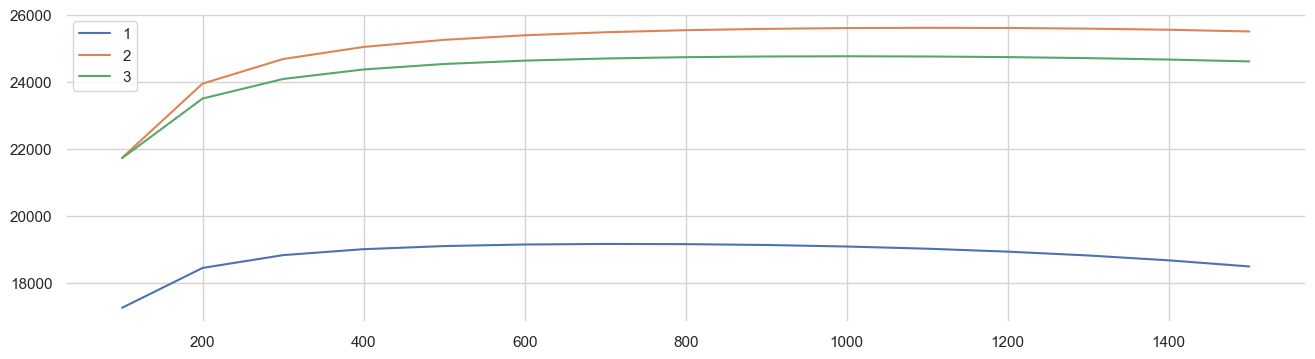

In [300]:
n = np.arange(100,1600,100)

pd.DataFrame( [ ((LTV.loc[4].values * i) - (CAC.loc[i].values)) /i for i in n] , index=n, columns=[1,2,3]).plot()
plt.ticklabel_format(style='plain', axis='y')

### Каналы с наибольшей прибылью на человека, по месяцам LTV

Text(0.5, 0, 'Клиенты')

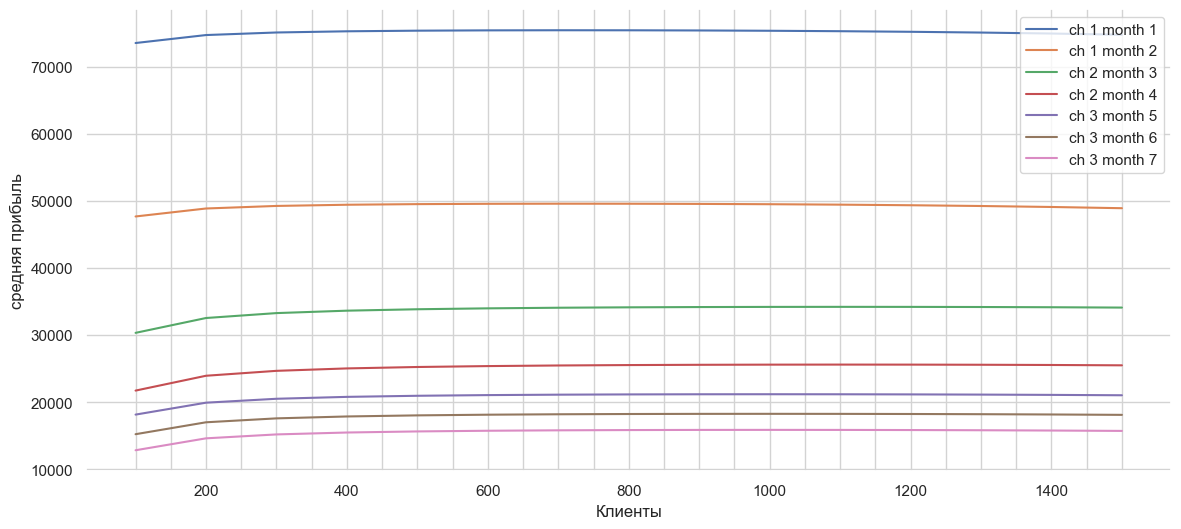

In [306]:
plt.figure(figsize=(14,6), facecolor='white')

for k in range(1,8):
    for channal in range(3):
        df = pd.DataFrame([((LTV.loc[k].values * i) - (CAC.loc[i].values)) /i for i in n])
        if df[channal].mean() ==  max(df.mean()):
            g = sns.lineplot(y= df[channal],x=n, label ='ch '+str(channal+1)+' month '+str(k))
            g.set_xticks(np.arange(100,1550,50), minor=True)
plt.grid(which='minor',)
plt.ylabel('средняя прибыль')
plt.xlabel('Клиенты')

### Вывод:
**В зависимости от наших целей и горизонтов планирования, максимальная прибыль может быть достигнута с помощью разных каналов.**
    
    Для первых 2х месяцев это будет 1 канал, с 75000 и 50000 у.е. на человека.
    
    Для 3-4 месяца, 2 канал, с 34000 и 26000 у.е. на человека.
    
    А для 7-6 будет 3 канал, с 21000, 18000 и 16000 у.е. на человека.
